In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(a):
    return np.where(a > 0, 1, 0)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)


In [3]:
def initialize_parameters(layers):
    np.random.seed(1)
    weights = [np.random.randn(layers[i], layers[i+1]) * 0.01 for i in range(len(layers) - 1)]
    biases = [np.zeros((1, layers[i+1])) for i in range(len(layers) - 1)]
    return weights, biases


In [4]:
def forward_propagation_relu(X, weights, biases):
    A = [X]
    Z = []
    for i in range(len(weights)):
        Z.append(np.dot(A[-1], weights[i]) + biases[i])
        if i == len(weights) - 1:
            A.append(softmax(Z[-1]))  # Softmax for the output layer
        else:
            A.append(relu(Z[-1]))  # ReLU for the hidden layers
    return Z, A


In [6]:
def backward_propagation_relu(X, Y, weights, biases, Z, A, learning_rate=0.01):
    m = Y.shape[0]
    dZ = A[-1] - Y
    for i in reversed(range(len(weights))):
        dW = np.dot(A[i].T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        if i > 0:
            dZ = np.dot(dZ, weights[i].T) * relu_derivative(A[i])  # Apply ReLU derivative for hidden layers
        weights[i] -= learning_rate * dW
        biases[i] -= learning_rate * db


In [7]:
def compute_loss(Y, Y_hat):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(Y_hat)) / m
    return loss

In [13]:
def compute_accuracy(X, Y, weights, biases):
    _, A = forward_propagation_relu(X, weights, biases)
    predictions = np.argmax(A[-1], axis=1)
    accuracy = np.mean(predictions == np.argmax(Y, axis=1))
    return accuracy


In [9]:
def train_neural_network(X_train, Y_train, X_val, Y_val, layers, epochs=1000, learning_rate=0.01):
    weights, biases = initialize_parameters(layers)
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        Z_train, A_train = forward_propagation_relu(X_train, weights, biases)
        Z_val, A_val = forward_propagation_relu(X_val, weights, biases)
        backward_propagation_relu(X_train, Y_train, weights, biases, Z_train, A_train, learning_rate)

        train_loss = compute_loss(Y_train, A_train[-1])
        val_loss = compute_loss(Y_val, A_val[-1])
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        train_accuracy = compute_accuracy(X_train, Y_train, weights, biases)
        val_accuracy = compute_accuracy(X_val, Y_val, weights, biases)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Training Loss {train_loss}, Validation Loss {val_loss}, Training Accuracy {train_accuracy}, Validation Accuracy {val_accuracy}')

    return weights, biases, train_losses, val_losses, train_accuracies, val_accuracies


In [10]:
def split_data(X, Y, train_size=0.6, val_size=0.2, test_size=0.2):
    assert train_size + val_size + test_size == 1
    num_samples = X.shape[0]
    indices = np.random.permutation(num_samples)

    train_end = int(train_size * num_samples)
    val_end = train_end + int(val_size * num_samples)

    X_train, Y_train = X[indices[:train_end]], Y[indices[:train_end]]
    X_val, Y_val = X[indices[train_end:val_end]], Y[indices[train_end:val_end]]
    X_test, Y_test = X[indices[val_end:]], Y[indices[val_end:]]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test


In [11]:
# Load the MNIST dataset
file_path = "/content/MNIST_Subset.h5"
with h5py.File(file_path, 'r') as h5file:
    X = np.array(h5file['X'])
    y = np.array(h5file['Y'])

# Reshape and normalize
X = X.reshape(X.shape[0], -1)
X = X / 255.0
Y = np.eye(10)[y.astype(int)]

# Split data
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(X, Y)

In [14]:
# 1 hidden layer with 100 units
layers_1 = [784, 100, 10]
weights_1, biases_1, train_losses_1, val_losses_1, train_accuracies_1, val_accuracies_1 = train_neural_network(X_train, Y_train, X_val, Y_val, layers_1)

Epoch 0: Training Loss 2.3089375285895, Validation Loss 2.3089652886771, Training Accuracy 0.013333333333333334, Validation Accuracy 0.014736842105263158
Epoch 100: Training Loss 0.867894805545787, Validation Loss 0.8699933481470534, Training Accuracy 0.8018713450292397, Validation Accuracy 0.8056140350877193
Epoch 200: Training Loss 0.6438156048931555, Validation Loss 0.6438535670202967, Training Accuracy 0.9035087719298246, Validation Accuracy 0.9147368421052632
Epoch 300: Training Loss 0.43306567305673266, Validation Loss 0.4316077864823505, Training Accuracy 0.9188304093567251, Validation Accuracy 0.9224561403508772
Epoch 400: Training Loss 0.28627822503495937, Validation Loss 0.28467551360800913, Training Accuracy 0.9283040935672514, Validation Accuracy 0.9333333333333333
Epoch 500: Training Loss 0.22553936706194994, Validation Loss 0.2251280361269907, Training Accuracy 0.9347368421052632, Validation Accuracy 0.9378947368421052
Epoch 600: Training Loss 0.19679986406745983, Validat

In [15]:
# 3 hidden layers with 100, 50, 50 units
layers_2 = [784, 100, 50, 50, 10]
weights_2, biases_2, train_losses_2, val_losses_2, train_accuracies_2, val_accuracies_2 = train_neural_network(X_train, Y_train, X_val, Y_val, layers_2)

Epoch 0: Training Loss 2.3025895741013636, Validation Loss 2.3025898990158704, Training Accuracy 0.5132163742690058, Validation Accuracy 0.5070175438596491
Epoch 100: Training Loss 1.9419184210039147, Validation Loss 1.9420694870623314, Training Accuracy 0.5132163742690058, Validation Accuracy 0.5070175438596491
Epoch 200: Training Loss 1.6611549673063244, Validation Loss 1.661430523788263, Training Accuracy 0.5132163742690058, Validation Accuracy 0.5070175438596491
Epoch 300: Training Loss 1.449970970238887, Validation Loss 1.4503380918355158, Training Accuracy 0.5132163742690058, Validation Accuracy 0.5070175438596491
Epoch 400: Training Loss 1.2928851393098435, Validation Loss 1.2933111246959499, Training Accuracy 0.5132163742690058, Validation Accuracy 0.5070175438596491
Epoch 500: Training Loss 1.175005244780983, Validation Loss 1.1754623122376961, Training Accuracy 0.5132163742690058, Validation Accuracy 0.5070175438596491
Epoch 600: Training Loss 1.0847106975042162, Validation L

In [16]:
# Save the models after training
def save_model(weights, biases, filename):
    np.savez(filename, **{'weights_' + str(i): w for i, w in enumerate(weights)},
                     **{'biases_' + str(i): b for i, b in enumerate(biases)})

save_model(weights_1, biases_1, 'best_model_1.npz')
save_model(weights_2, biases_2, 'best_model_2.npz')


In [17]:
# Evaluate on test set
accuracy_1 = compute_accuracy(X_test, Y_test, weights_1, biases_1)
accuracy_2 = compute_accuracy(X_test, Y_test, weights_2, biases_2)

print(f'Accuracy with 1 hidden layer: {accuracy_1}')
print(f'Accuracy with 3 hidden layers: {accuracy_2}')


Accuracy with 1 hidden layer: 0.9442300947036127
Accuracy with 3 hidden layers: 0.512101017186952


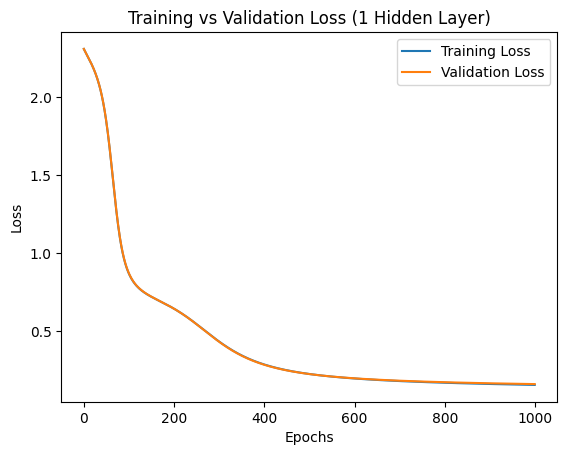

In [18]:
# Plot training and validation loss for model with 1 hidden layer
plt.plot(train_losses_1, label='Training Loss')
plt.plot(val_losses_1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (1 Hidden Layer)')
plt.legend()
plt.show()

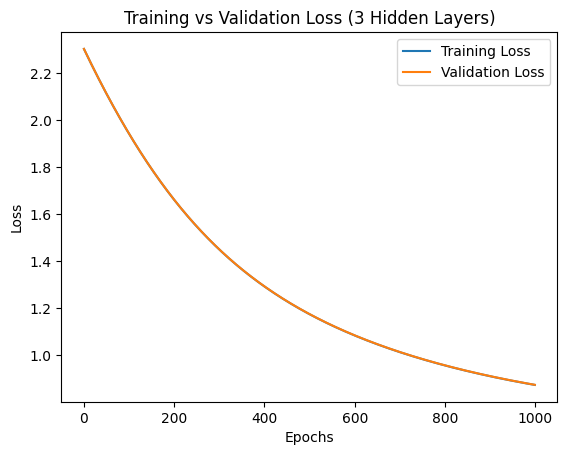

In [19]:
# Plot training and validation loss for model with 3 hidden layers
plt.plot(train_losses_2, label='Training Loss')
plt.plot(val_losses_2, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss (3 Hidden Layers)')
plt.legend()
plt.show()
